<a href="https://colab.research.google.com/github/AliceKitchkin/Unsupervised-Machine-Learning/blob/main/FifaPlayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Bibliotheken und Daten Import

In [175]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# pca
from sklearn.decomposition import PCA

# clustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# evaluations
from sklearn.metrics import adjusted_rand_score, davies_bouldin_score, calinski_harabasz_score, silhouette_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [177]:
data_players = pd.read_csv("/content/drive/MyDrive/Bachelorarbeit/CSV/FifaPlayer.csv")

#Overview

In [178]:
data_players.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age         dob  height_cm  \
0       93         93   78000000.0  320000.0   34  1987-06-24        170   
1       92         92  119500000.0  270000.0   32  1988-08-21        185   
2       91         91   45000000.0  270000.0   36  1985-02-05        187   
3       91         91  129000000.0  270000.0   29  1992-02-05        175   
4       91         91  125500000.0  350000.0   30  1991-06-28        181   

   weight_kg  club_team_id            club_name             league_name  \
0         72          73.0  Paris Saint-Germain          French Ligue 1   
1         81          21.0    FC Bayern München    German 1. Bundesliga   
2         83          11.0    Manchester United  English Premier League   
3         68          73.0  Paris Saint-Germain          French Ligue 1   
4         70          10.0      Manchester City  English Premier League   

   league_level club_position  club_jersey_number club_loaned_from  \
0           1.0            RW                30.0              NaN   
1           1.0            ST                 9.0              NaN   
2           1.0            ST                 7.0              NaN   
3           1.0            LW                10.0              NaN   
4           1.0           RCM                17.0              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                     2023.0              52        Argentina   
1  2014-07-01                     2023.0              37           Poland   
2  2021-08-27                     2023.0              38         Portugal   
3  2017-08-03                     2025.0              54           Brazil   
4  2015-08-30                     2025.0               7          Belgium   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              RW                  10.0           Left   
1          1353.0              RS                   9.0          Right   
2          1354.0              ST                   7.0          Right   
3             NaN             NaN                   NaN          Right   
4          1325.0             RCM                   7.0          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0          4            4                         5   Medium/Low    Unique   
1          4            4                         5  High/Medium    Unique   
2          4            5                         5     High/Low    Unique   
3          5            5                         5  High/Medium    Unique   
4          5            4                         4    High/High    Unique   

  real_face  release_clause_eur  \
0       Yes         144300000.0   
1       Yes         197200000.0   
2       Yes          83300000.0   
3       Yes         238700000.0   
4       Yes         232200000.0   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Distance Shoote

In [179]:
data_players.shape

(19239, 110)

In [180]:
data_players.describe()

sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000  19239.000000   19178.000000  19178.000000   
mean      25.210822    181.299704     74.943032   50580.498123      1.354364   
std        4.748235      6.863179      7.069434   54401.868535      0.747865   
min       16.000000    155.000000     49.000000       1.000000      1.000000   
25%       21.000000    176.000000     70.000000     479.000000      1.000000   
50%       25.000000    181.000000     75.000000    1938.000000      1.000000   
75%       29.000000    186.000000     80.000000  111139.000000      1.000000   
max       54.000000    206.000000    110.000000  115820.000000      5.000000   

       club_jersey_number  club_contract_valid_until  nationality_id  \
count        19178.000000               19178.000000    19239.000000   
mean            20.945250                2022.764000       58.602682   
std             17.909369                   1.213203       50.298614   
min              1.000000                2021.000000        1.000000   
25%              9.000000                2022.000000       21.000000   
50%             18.000000                2022.000000       45.000000   
75%             27.000000                2024.000000       60.000000   
max             99.000000                2031.000000      219.000000   

       nation_team_id  nation_jersey_number     weak_foot   skill_moves  \
count      759.000000            759.000000  19239.000000  19239.000000   
mean     14480.848485             12.567852      2.946151      2.352461   
std      35328.730217              7.039116      0.671560      0.767659   
min       1318.000000              1.000000      1.000000      1.000000   
25%       1338.000000              7.000000      3.000000      2.000000   
50%       1357.000000             12.000000      3.000000      2.000000   
75%       1386.000000             19.000000      3.000000      3.000000   
max     111473.000000             28.000000      5.000000      5.000000   

       international_reputation  release_clause_eur          pace  \
count              19239.000000        1.806300e+04  17107.000000   
mean                   1.094184        5.374044e+06     68.213071   
std                    0.371098        1.494837e+07     10.933155   
min                    1.000000        1.600000e+04     28.000000   
25%                    1.000000        8.060000e+05     62.000000   
50%                    1.000000        1.600000e+06     69.000000   
75%                    1.000000        3.700000e+06     76.000000   
max                    5.000000        3.735000e+08     97.000000   

           shooting       passing     dribbling     defending        physic  \
count  17107.000000  17107.000000  17107.000000  17107.000000  17107.000000   
mean      52.345297     57.312562     62.561174     51.703630     64.823289   
std       14.051623     10.068965      9.651312     16.189746      9.791886   
min       18.000000     25.000000     27.000000     14.000000     29.000000   
25%       42.000000     51.000000     57.000000     37.000000     59.000000   
50%       54.000000     58.000000     64.000000     56.000000     66.000000   
75%       63.000000     64.000000     69.000000     64.00000

In [181]:
#get only the columns
data_players.describe().columns

Index(['sofifa_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision

#Handling Missing Values

In [182]:
#before mean fill
data_players.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

In [183]:
#fill na with mean
data_players = data_players.fillna(data_players.mean())

In [184]:
#after drop
data_players.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

#KMeans Clustering

In [185]:
data = data_players[['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']]

In [186]:
#data = data[data.overall>50]

In [187]:
data.shape

(19239, 60)

In [188]:
names = data.short_name.tolist()
data = data.drop(['short_name'], axis=1)

##Feature Scaling

In [189]:
#Scaling with minMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
df_data_scaled = pd.DataFrame(data_scaled)

In [190]:
#after scaling
df_data_scaled.head()

0         1         2         3         4         5         6   \
0  1.000000  0.956522  0.402034  0.914163  0.473684  0.294118  0.377049   
1  0.978261  0.934783  0.615962  0.771102  0.421053  0.588235  0.524590   
2  0.956522  0.913043  0.231923  0.771102  0.526316  0.627451  0.557377   
3  0.956522  0.913043  0.664933  0.771102  0.342105  0.392157  0.311475   
4  0.956522  0.913043  0.646891  1.000000  0.368421  0.509804  0.344262   

         7    8         9    10        11        12        13    14    15  \
0  0.000622  0.0  0.295918  0.2  0.233945  0.000463  0.333333  0.75  0.75   
1  0.000173  0.0  0.081633  0.2  0.165138  0.000318  0.296296  0.75  0.75   
2  0.000086  0.0  0.061224  0.2  0.169725  0.000327  0.222222  0.75  1.00   
3  0.000622  0.0  0.091837  0.4  0.243119  0.119494  0.428439  1.00  1.00   
4  0.000078  0.0  0.163265  0.4  0.027523  0.000064  0.222222  1.00  0.75   

     16        17        18        19        20        21        22        23  \
0  1.00  0.386319  0.826087  0.973684  0.970588  1.000000  0.259740  0.590164   
1  1.00  0.527958  0.724638  0.973684  0.794118  0.867647  0.389610  0.868852   
2  1.00  0.222992  0.855072  1.000000  0.808824  0.897059  0.259740  0.754098   
3  1.00  0.639074  0.913043  0.855263  0.897059  0.985294  0.298701  0.557377   
4  0.75  0.621671  0.695652  0.894737  1.000000  0.897059  0.649351  0.803279   

         24        25        26        27        28        29        30  \
0  0.897727  1.000000  0.738636  0.965517  0.977011  1.000000  0.988636   
1  0.738636  1.000000  0.965909  0.896552  0.988506  0.880435  0.829545   
2  0.920455  1.000000  0.965909  0.839080  0.954023  0.913043  0.852273   
3  0.897727  0.870968  0.659091  0.908046  0.954023  0.989130  0.931818   
4  1.000000  0.860215  0.568182  1.000000  0.908046  0.913043  0.897727   

         31        32        33        34        35        36        37  \
0  1.000000  0.976190  1.000000  0.927711  0.792683  0.935897  1.000000   
1  0.900000  0.726190  0.909091  0.759036  0.780488  0.756410  0.985507   
2  0.888889  0.809524  0.909091  0.855422  0.890244  0.871795  1.000000   
3  0.922222  0.857143  0.988636  0.951807  0.902439  1.000000  0.927536   
4  0.877778  1.000000  0.943182  0.746988  0.743902  0.782051  0.956522   

         38        39        40        41        42        43        44  \
0  0.987654  0.880000  0.630137  0.705882  0.641026  1.000000  0.400000   
1  0.827160  0.933333  0.863014  0.752941  0.858974  0.922222  0.835294   
2  0.728395  0.986667  1.000000  0.764706  0.743590  0.988889  0.623529   
3  0.851852  0.800000  0.575342  0.811765  0.435897  0.855556  0.623529   
4  0.777778  0.946667  0.561644  0.905882  0.705128  0.966667  0.776471   

         45        46        47        48        49        50        51  \
0  0.420455  0.968085  1.000000  0.790698  1.000000  0.179775  0.340909   
1  0.522727  0.989362  0.835294  0.965116  0.904762  0.348315  0.420455   
2  0.295455  0.989362  0.776471  0.941860  0.988095  0.224719  0.306818   
3  0.386364  0.893617  0.941176  1.000000  0.964286  0.348315  0.306818   
4  0.715909  0.914894  0.988235  0.883721  0.916667  0.719101  0.681818   

         52        53        54        55        56        57        58  
0  0.218391  0.044944  0.100000  0.142857  0.133333  0.068182  0.428799  
1  0.160920  0.146067  0.044444  0.109890  0.066667  0.090909  0.428799  
2  0.218391  0.056180  0.100000  0.142857  0.133333  0.102273  0.428799  
3  0.275862  0.078652  0.077778  0.142857  0.144444  0.102273  0.428799  
4  0.551724  0.146067  0.122222  0.032967  0.088889  0.125000  0.428799

In [191]:
#after scaling
df_data_scaled.describe()

0             1             2             3             4   \
count  19239.000000  19239.000000  19239.000000  19239.000000  19239.000000   
mean       0.408091      0.479986      0.014647      0.024372      0.242390   
std        0.149570      0.132309      0.039172      0.055620      0.124954   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.304348      0.391304      0.002402      0.001431      0.131579   
50%        0.413043      0.478261      0.004980      0.007153      0.236842   
75%        0.500000      0.565217      0.010779      0.021459      0.342105   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 5             6             7             8             9   \
count  19239.000000  19239.000000  19239.000000  19239.000000  19239.000000   
mean       0.515680      0.425296      0.436712      0.088591      0.203523   
std        0.134572      0.115892      0.468969      0.186670      0.182459   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.411765      0.344262      0.004127      0.000000      0.081633   
50%        0.509804      0.426230      0.016733      0.000000      0.173469   
75%        0.607843      0.508197      0.959575      0.000000      0.265306   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 10            11            12            13            14  \
count  19239.000000  19239.000000  19239.000000  19239.000000  19239.000000   
mean       0.176400      0.264232      0.119494      0.428439      0.486538   
std        0.121128      0.230728      0.063662      0.051750      0.167890   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.100000      0.091743      0.119494      0.428439      0.500000   
50%        0.100000      0.201835      0.119494      0.428439      0.500000   
75%        0.300000      0.270642      0.119494      0.428439      0.500000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 15            16            17            18            19  \
count  19239.000000  19239.000000  19239.000000  19239.000000  19239.000000   
mean       0.338115      0.023546      0.014346      0.582798      0.451912   
std        0.191915      0.092775      0.038782      0.149414      0.174344   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.250000      0.000000      0.002220      0.507246      0.342105   
50%        0.250000      0.000000      0.004777      0.582798      0.451912   
75%        0.500000      0.000000      0.012274      0.681159      0.578947   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 20            21            22            23            24  \
count  19239.000000  19239.000000  19239.000000  19239.000000  19239.000000   
mean       0.475185      0.522958      0.489658      0.587267      0.495198   
std        0.139627      0.133836      0.198264      0.151367      0.204939   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.397059      0.455882      0.337662      0.508197      0.363636   
50%        0.475185      0.522958      0.506494      0.587267      0.545455   
75%        0.558824      0.602941      0.636364      0.688525      0.647727   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 25            26            27            28            29  \
count  19239.000000  19239.000000  19239.000000  19239.000000  19239.000000   
mean       0.471983      0.531635      0.596184      0.453607      0.561526   
std        0.212054      0.196525      0.166562      0.202912      0.204180   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.301075      0.443182      0.540230      0.310345 

##PCA

In [192]:
pca = PCA() #all components included
data_pca = pd.DataFrame(pca.fit_transform(data_scaled)) #runs the model on the data

Text(0, 0.5, 'Cumulative explained Variance')

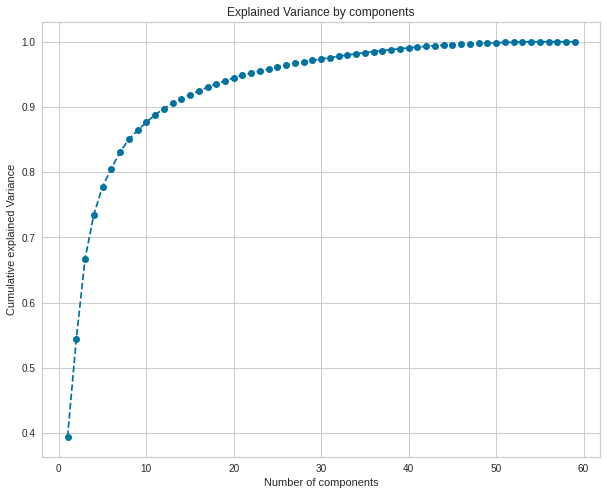

In [193]:
plt.figure(figsize=(10,8))
plt.plot(range(1,60), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained Variance')

###PCA 2D

PCA to visualize all features in a 2 dimension plot (5D to 2D)

In [194]:
pca_2d = PCA(n_components=2) #2D for the plot
data_2d = pd.DataFrame(pca_2d.fit_transform(data_scaled)) #runs the model on the data

In [195]:
data_2d.head()

0         1
0 -1.799933 -1.303398
1 -1.670038 -0.816557
2 -1.705546 -1.130828
3 -1.773266 -1.201199
4 -1.907847 -0.410986

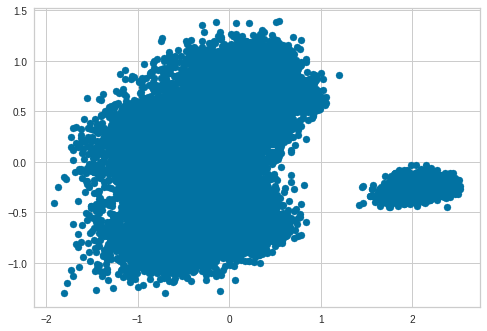

In [196]:
plt.scatter(data_2d[0], data_2d[1])

###PCA 3D

PCA to visualize 5 features (the 5 columns from the data above) in a 3 dimension plot (5D to 3D)

In [197]:
pca_3d = PCA(n_components=3) #3D for the plot
data_3d = pd.DataFrame(pca_3d.fit_transform(data_scaled)) #runs the model on the data

In [198]:
data_3d.head()

0         1         2
0 -1.799933 -1.303398  0.684457
1 -1.670038 -0.816557  0.752538
2 -1.705546 -1.130828  0.726772
3 -1.773266 -1.201199  0.664909
4 -1.907847 -0.410986  0.799741

##Clustering 2D

###Elbow Method 2D

To find the optimal number of cluster

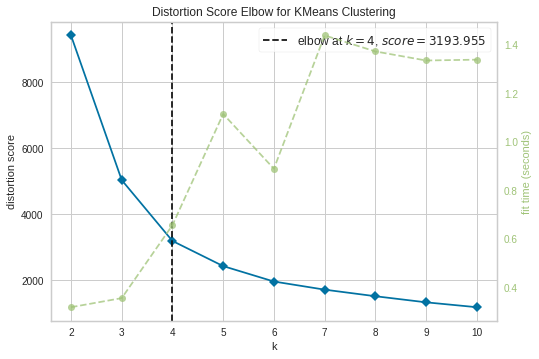

In [199]:
elbow10_2d = KElbowVisualizer(KMeans(), k=10)
elbow10_2d.fit(data_2d)
elbow10_2d.show()

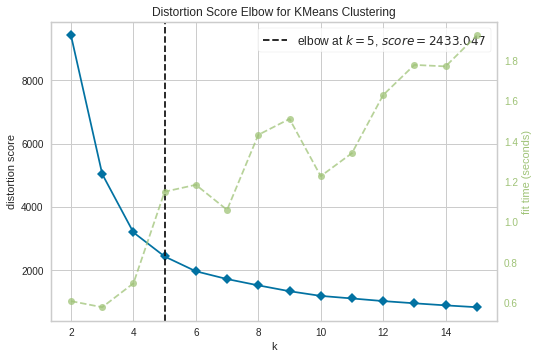

In [200]:
elbow15_2d = KElbowVisualizer(KMeans(), k=15)
elbow15_2d.fit(data_2d)
elbow15_2d.show()

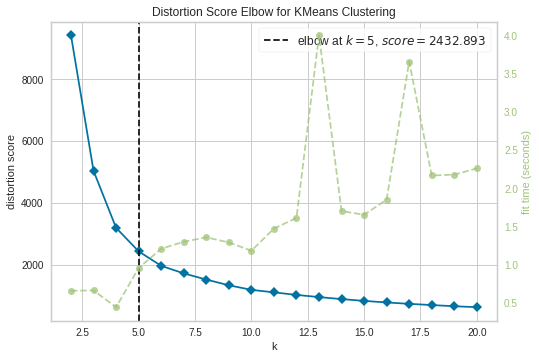

In [201]:
elbow20_2d = KElbowVisualizer(KMeans(), k=20)
elbow20_2d.fit(data_2d)
elbow20_2d.show()

In [202]:
print('k=10: ', elbow10_2d.elbow_value_)
print('k=15: ', elbow15_2d.elbow_value_)
print('k=20: ', elbow20_2d.elbow_value_)

k=10:  4
k=15:  5
k=20:  5


###Silhouette Score 2D

0.46473275049510004


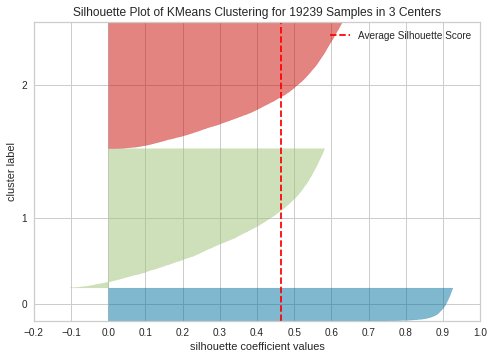

In [203]:
kmeans3_2d = KMeans(n_clusters = 3, random_state=42)
visualizer3_2d = SilhouetteVisualizer(kmeans3_2d, colors='yellowbrick')
visualizer3_2d.fit(data_2d)

print(visualizer3_2d.silhouette_score_)
visualizer3_2d.show()

0.47212734911550064


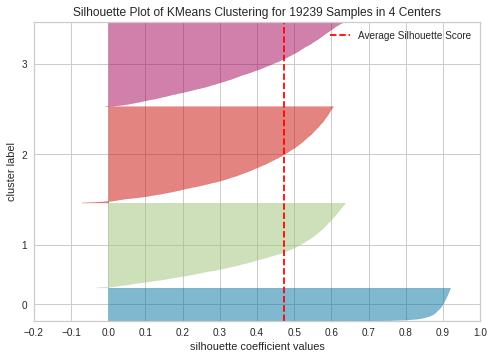

In [204]:
kmeans4_2d = KMeans(n_clusters = 4, random_state=42)
visualizer4_2d = SilhouetteVisualizer(kmeans4_2d, colors='yellowbrick')
visualizer4_2d.fit(data_2d)

print(visualizer4_2d.silhouette_score_)
visualizer4_2d.show()

0.45615401760694096


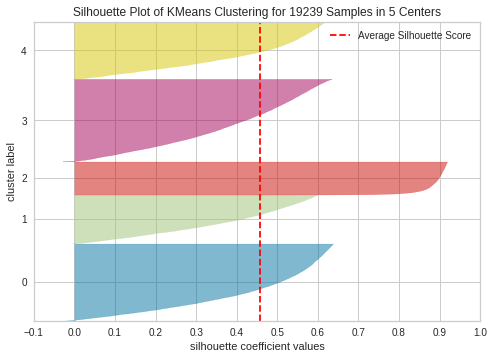

In [205]:
kmeans5_2d = KMeans(n_clusters = 5, random_state=42)
visualizer5_2d = SilhouetteVisualizer(kmeans5_2d, colors='yellowbrick')
visualizer5_2d.fit(data_2d)

print(visualizer5_2d.silhouette_score_)
visualizer5_2d.show()

In [206]:
print('03 Cluster: ', visualizer3_2d.silhouette_score_)
print('04 Cluster: ', visualizer4_2d.silhouette_score_)
print('05 Cluster: ', visualizer5_2d.silhouette_score_)

03 Cluster:  0.46473275049510004
04 Cluster:  0.47212734911550064
05 Cluster:  0.45615401760694096


###K-Means 2D

In [207]:
#specify the number of clusters we got from silhouette score
kmeans = KMeans(n_clusters=4)

In [208]:
#fit the scaled data
kmeans = kmeans.fit(data_2d)

In [209]:
#get the cluster labels
labels = kmeans.predict(data_2d)

In [210]:
#get the centroid values
centroids = kmeans.cluster_centers_

In [211]:
#get the cluster values
clusters = kmeans.labels_.tolist()

###Visualization 2D

In [212]:
data_v_2d = data_2d.copy()

In [213]:
#add new column for cluster
data_v_2d['cluster'] = clusters

#add new column for player names
data_v_2d['name'] = names

data_v_2d.columns = ['x', 'y', 'cluster', 'name']

In [214]:
data_v_2d.head()

x         y  cluster               name
0 -1.799933 -1.303398        3           L. Messi
1 -1.670038 -0.816557        3     R. Lewandowski
2 -1.705546 -1.130828        3  Cristiano Ronaldo
3 -1.773266 -1.201199        3          Neymar Jr
4 -1.907847 -0.410986        0       K. De Bruyne

In [215]:
# data_v_2d[(data_v_2d.x < -0.5) & (data_v_2d.y.between(0,0.5))]
# data_v_2d[(data_v_2d.x<1) & (data_v_2d.y>1.5)]

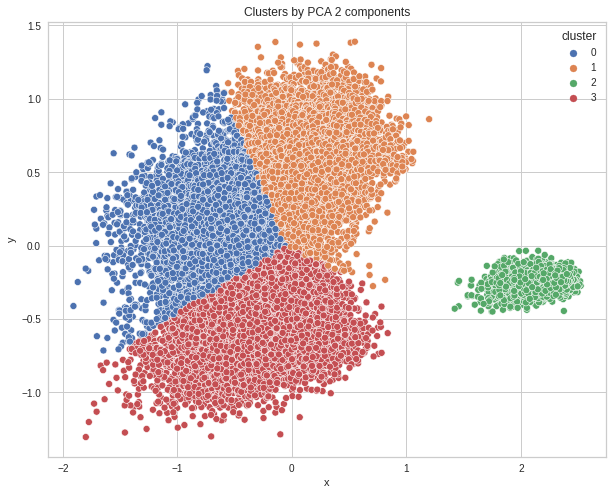

In [216]:
x_axis = data_v_2d['x'] #component/column x in table
y_axis = data_v_2d['y'] #component/column y in table
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=data_v_2d['cluster'], palette ="deep")
plt.title('Clusters by PCA 2 components')
plt.show()

##Clustering 3D

###Elbow Method 3D

To find the optimal number of cluster

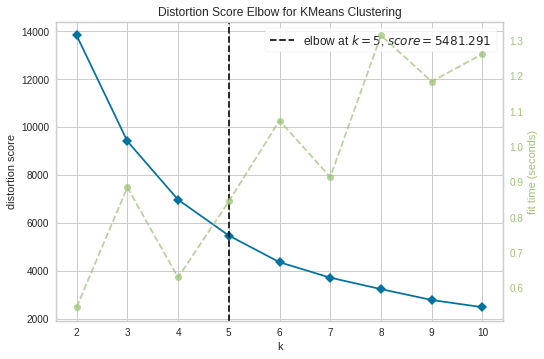

In [217]:
elbow10 = KElbowVisualizer(KMeans(), k=10)
elbow10.fit(data_3d)
elbow10.show()

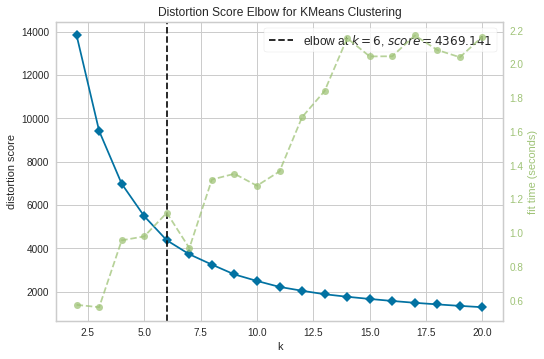

In [218]:
elbow20 = KElbowVisualizer(KMeans(), k=20)
elbow20.fit(data_3d)
elbow20.show()

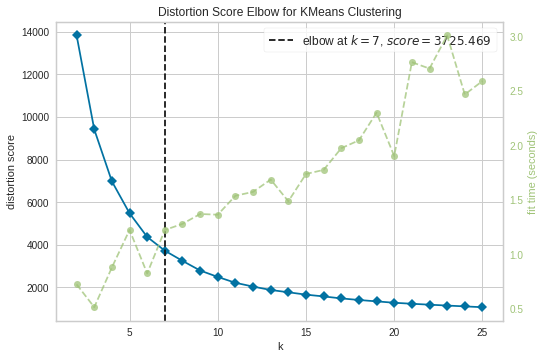

In [219]:
elbow25 = KElbowVisualizer(KMeans(), k=25)
elbow25.fit(data_3d)
elbow25.show()

In [220]:
print('k=10: ', elbow10.elbow_value_)
print('k=20: ', elbow20.elbow_value_)
print('k=25: ', elbow25.elbow_value_)

k=10:  5
k=20:  6
k=25:  7


###Silhouette Score 3D

0.3510886667864884


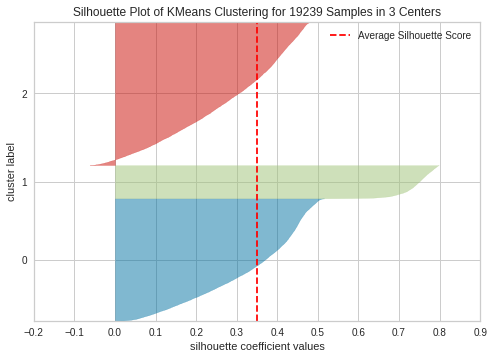

In [221]:
kmeans3 = KMeans(n_clusters = 3, random_state=42)
visualizer3 = SilhouetteVisualizer(kmeans3, colors='yellowbrick')
visualizer3.fit(data_3d)

print(visualizer3.silhouette_score_)
visualizer3.show()

0.3694561400463765


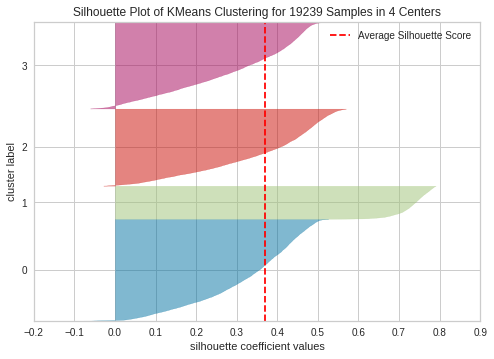

In [222]:
kmeans4 = KMeans(n_clusters = 4, random_state=42)
visualizer4 = SilhouetteVisualizer(kmeans4, colors='yellowbrick')
visualizer4.fit(data_3d)

print(visualizer4.silhouette_score_)
visualizer4.show()

0.3892671976722826


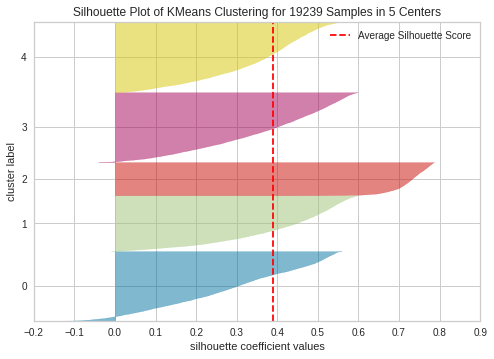

In [223]:
kmeans5 = KMeans(n_clusters = 5, random_state=42)
visualizer5 = SilhouetteVisualizer(kmeans5, colors='yellowbrick')
visualizer5.fit(data_3d)

print(visualizer5.silhouette_score_)
visualizer5.show()

0.41599368377537965


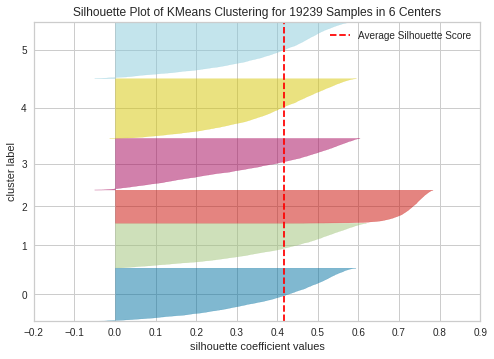

In [224]:
kmeans6 = KMeans(n_clusters = 6, random_state=42)
visualizer6 = SilhouetteVisualizer(kmeans6, colors='yellowbrick')
visualizer6.fit(data_3d)

print(visualizer6.silhouette_score_)
visualizer6.show()

0.4227318632231577


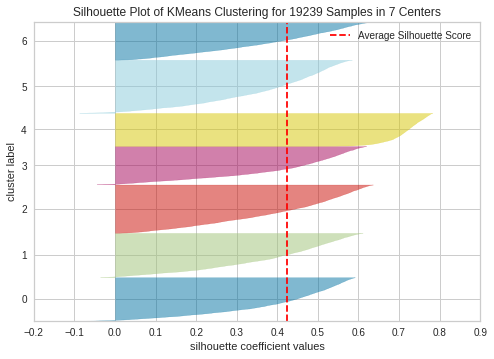

In [238]:
kmeans7 = KMeans(n_clusters = 7, random_state=42)
visualizer7 = SilhouetteVisualizer(kmeans7, colors='yellowbrick')
visualizer7.fit(data_3d)

print(visualizer7.silhouette_score_)
visualizer7.show()

In [239]:
print('03 Cluster: ', visualizer3.silhouette_score_)
print('04 Cluster: ', visualizer4.silhouette_score_)
print('05 Cluster: ', visualizer5.silhouette_score_)
print('06 Cluster: ', visualizer6.silhouette_score_)
print('07 Cluster: ', visualizer7.silhouette_score_)

03 Cluster:  0.3510886667864884
04 Cluster:  0.3694561400463765
05 Cluster:  0.3892671976722826
06 Cluster:  0.41599368377537965
07 Cluster:  0.4227318632231577


###K-Means 3D

In [226]:
#specify the number of clusters we got from silhouette score
kmeans_3d = KMeans(n_clusters=5)

In [227]:
#fit the scaled data
kmeans_3d = kmeans.fit(data_3d)

In [228]:
#get the cluster labels
#labels_3d = kmeans_3d.predict(data_3d)

In [229]:
#get the centroid values
centroids_3d = kmeans_3d.cluster_centers_
centroids_3d

array([[-0.23661663, -0.36746287, -0.51270876],
       [-0.5981343 , -0.19324644,  0.39000273],
       [ 0.08360412,  0.62035996, -0.12107914],
       [ 2.13651166, -0.2523978 ,  0.3009801 ]])

In [230]:
#get the cluster values
clusters_3d = kmeans_3d.labels_.tolist()

###Visualization 3D

In [231]:
data_v_3d = data_3d.copy()

In [232]:
#add new column for cluster
data_v_3d['cluster'] = clusters_3d

#add new column for player names
data_v_3d['name'] = names

data_v_3d.columns = ['x', 'y', 'z', 'cluster', 'name']

In [233]:
data_v_3d.head()

x         y         z  cluster               name
0 -1.799933 -1.303398  0.684457        1           L. Messi
1 -1.670038 -0.816557  0.752538        1     R. Lewandowski
2 -1.705546 -1.130828  0.726772        1  Cristiano Ronaldo
3 -1.773266 -1.201199  0.664909        1          Neymar Jr
4 -1.907847 -0.410986  0.799741        1       K. De Bruyne

In [234]:
import plotly.express as px
fig = px.scatter_3d(data_v_3d, x='x', y='y', z='z', hover_name="name", hover_data=["name"], color='cluster')
fig.show()

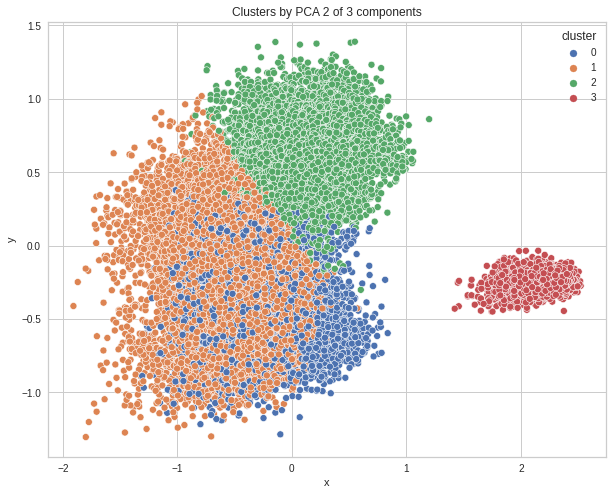

In [235]:
x_axis = data_v_3d['x'] #component/column x in table
y_axis = data_v_3d['y'] #component/column y in table
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=data_v_3d['cluster'], palette ="deep")
plt.title('Clusters by PCA 2 of 3 components')
plt.show()

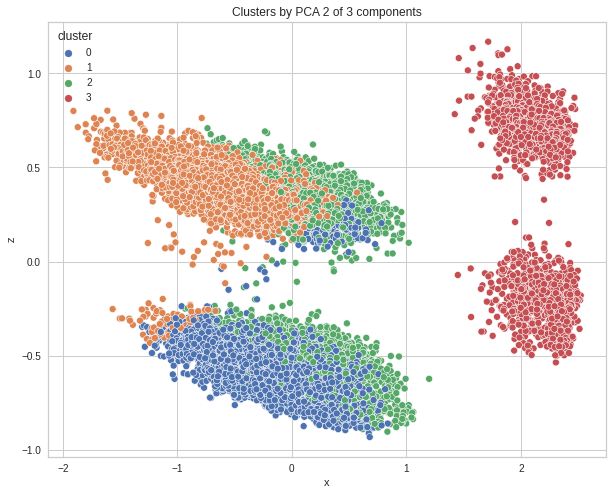

In [236]:
x_axis = data_v_3d['x'] #component/column x in table
z_axis = data_v_3d['z'] #component/column z in table
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, z_axis, hue=data_v_3d['cluster'], palette ="deep")
plt.title('Clusters by PCA 2 of 3 components')
plt.show()

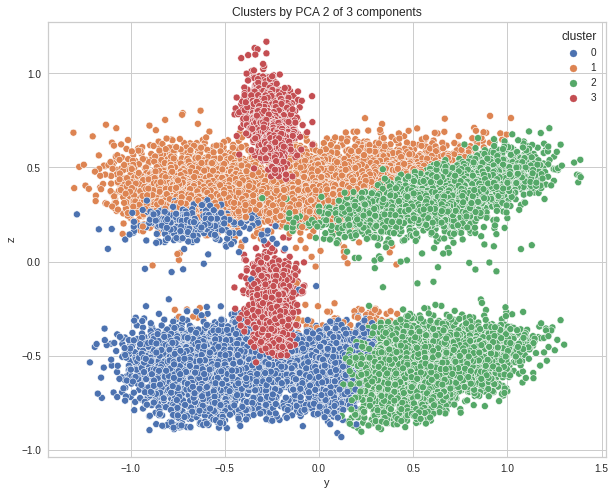

In [237]:
y_axis = data_v_3d['y'] #component/column y in table
z_axis = data_v_3d['z'] #component/column z in table
plt.figure(figsize=(10,8))
sns.scatterplot(y_axis, z_axis, hue=data_v_3d['cluster'], palette ="deep")
plt.title('Clusters by PCA 2 of 3 components')
plt.show()

#DBScan Clustering

In [343]:
data = data_players[['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']]

In [344]:
#copy specific columns from the original dataset
#data = data[data.overall>86].copy()
data = data.fillna(data.mean())
names = data.short_name.tolist()
data = data.drop(['short_name'], axis=1)

x = data.values

In [345]:
data.head()

overall  potential    value_eur  wage_eur  age  height_cm  weight_kg  \
0       93         93   78000000.0  320000.0   34        170         72   
1       92         92  119500000.0  270000.0   32        185         81   
2       91         91   45000000.0  270000.0   36        187         83   
3       91         91  129000000.0  270000.0   29        175         68   
4       91         91  125500000.0  350000.0   30        181         70   

   club_team_id  league_level  club_jersey_number  club_contract_valid_until  \
0          73.0           1.0                30.0                     2023.0   
1          21.0           1.0                 9.0                     2023.0   
2          11.0           1.0                 7.0                     2023.0   
3          73.0           1.0                10.0                     2025.0   
4          10.0           1.0                17.0                     2025.0   

   nationality_id  nation_team_id  nation_jersey_number  weak_foot  \
0              52     1369.000000             10.000000          4   
1              37     1353.000000              9.000000          4   
2              38     1354.000000              7.000000          4   
3              54    14480.848485             12.567852          5   
4               7     1325.000000              7.000000          5   

   skill_moves  international_reputation  release_clause_eur  pace  shooting  \
0            4                         5         144300000.0  85.0      92.0   
1            4                         5         197200000.0  78.0      92.0   
2            5                         5          83300000.0  87.0      94.0   
3            5                         5         238700000.0  91.0      83.0   
4            4                         4         232200000.0  76.0      86.0   

   passing  dribbling  defending  physic  attacking_crossing  \
0     91.0       95.0       34.0    65.0                  85   
1     79.0       86.0       44.0    82.0                  71   
2     80.0       88.0       34.0    75.0                  87   
3     86.0       94.0       37.0    63.0                  85   
4     93.0       88.0       64.0    78.0                  94   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       91   
1                   95                          90                       85   
2                   95                          90                       80   
3                   83                          63                       86   
4                   82                          55                       94   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               96           93                 94   
1                 89               85           79                 85   
2                 86               88           81                 84   
3                 86               95           88                 87   
4                 82               88           85                 83   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  91                  96                     91   
1                  70                  88                     77   
2                  77                  88                     85   
3                  81                  95                     93   
4                  93                  91                     76   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     80                91                  94   
1                     79                77                  93   
2                     88                86                  94   
3                     89                96                  89   
4                     76                79                  91   

   movement_balance  power_shot_power  power_jumping  power_stam

In [346]:
x

array([[9.30000000e+01, 9.30000000e+01, 7.80000000e+07, ...,
        1.40000000e+01, 8.00000000e+00, 3.64399625e+01],
       [9.20000000e+01, 9.20000000e+01, 1.19500000e+08, ...,
        8.00000000e+00, 1.00000000e+01, 3.64399625e+01],
       [9.10000000e+01, 9.10000000e+01, 4.50000000e+07, ...,
        1.40000000e+01, 1.10000000e+01, 3.64399625e+01],
       ...,
       [4.70000000e+01, 5.50000000e+01, 1.00000000e+05, ...,
        1.00000000e+01, 6.00000000e+00, 3.64399625e+01],
       [4.70000000e+01, 6.00000000e+01, 1.10000000e+05, ...,
        1.40000000e+01, 1.50000000e+01, 3.64399625e+01],
       [4.70000000e+01, 6.00000000e+01, 1.10000000e+05, ...,
        9.00000000e+00, 1.40000000e+01, 3.64399625e+01]])

##Scaling

In [347]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_norm = pd.DataFrame(x_scaled)

##PCA 2D

In [348]:
pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(x_norm))
reduced.head()

0         1
0 -1.799933 -1.303398
1 -1.670038 -0.816557
2 -1.705546 -1.130828
3 -1.773266 -1.201199
4 -1.907847 -0.410986

##Nearest Neighbors

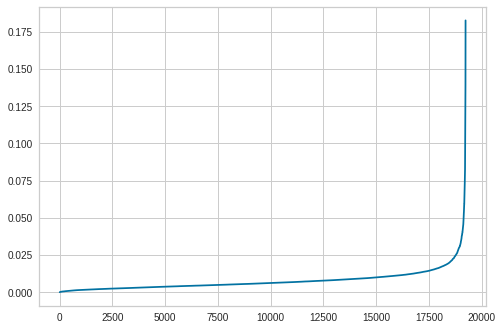

In [349]:
from sklearn.neighbors import NearestNeighbors

#calculate the distance from each point to its closest neighbor
nn = NearestNeighbors(n_neighbors=500)

#fit the nearest neighbor
nbrs = nn.fit(reduced)

#returns two arrays: distance to the closest n_neighbors point and index for each point
distances, indices = nbrs.kneighbors(reduced)

#sort the distance and plot it
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Hier kann man ablesen wie eps im DBScan gewählt werden sollte (~0.4), da wo die Kurve steil nach oben geht

##DBScan

In [351]:
#eps=0.4 und min_sample=2,3,4 haben den gleichen Silhouette Score wie
#eps=0.5 und min_sample=2,3,4,5
# , 0.075, 0.09, 0.1
i_eps = [0.05, 0.07, 0.09, 0.15]
j_samples = [9, 10, 11, 12]
sscores = []

for i in i_eps:
  for j in j_samples:
    db = DBSCAN(eps=i, min_samples=j).fit(data_scaled)
    db_clusters = db.fit_predict(reduced)
    sc = silhouette_score(data_scaled, db.labels_)
    sscores.append(sc)

    print('eps = ', i)
    print('min_samples = ', j)
    print('silhouette_score = ', sc)
    print('')

print('Max Silhouette Score: ', max(sscores))

eps =  0.05
min_samples =  9
silhouette_score =  0.059745088665627874

eps =  0.05
min_samples =  10
silhouette_score =  0.05998776768265947

eps =  0.05
min_samples =  11
silhouette_score =  0.02437045242510559

eps =  0.05
min_samples =  12
silhouette_score =  -0.007483629692640427

eps =  0.07
min_samples =  9
silhouette_score =  0.20025263715959638

eps =  0.07
min_samples =  10
silhouette_score =  0.1991065467489015

eps =  0.07
min_samples =  11
silhouette_score =  0.19916154998605476

eps =  0.07
min_samples =  12
silhouette_score =  0.11971381466502663

eps =  0.09
min_samples =  9
silhouette_score =  0.2719803331612003

eps =  0.09
min_samples =  10
silhouette_score =  0.2604375278614682

eps =  0.09
min_samples =  11
silhouette_score =  0.3044644542692716

eps =  0.09
min_samples =  12
silhouette_score =  0.2005232423493668

eps =  0.15
min_samples =  9
silhouette_score =  0.35957216839133

eps =  0.15
min_samples =  10
silhouette_score =  0.35957216839133

eps =  0.15
min_sa

**Value for min_samples**


As a rule of thumb, a minimum minPts can be derived from the number of dimensions D in the data set, as minPts ≥ D + 1. The low value minPts = 1 does not make sense, as then every point on its own will already be a cluster. With minPts ≤ 2, the result will be the same as of hierarchical clustering with the single link metric, with the dendrogram cut at height ε. Therefore, minPts must be chosen at least 3. However, larger values are usually better for data sets with noise and will yield more significant clusters. As a rule of thumb, minPts = 2·dim can be used, but it may be necessary to choose larger values for very large data, for noisy data or for data that contains many duplicates.

**Value for ε**

The value for ε can then be chosen by using a k-distance graph, plotting the distance to the k = minPts-1 nearest neighbor ordered from the largest to the smallest value. Good values of ε are where this plot shows an “elbow”: if ε is chosen much too small, a large part of the data will not be clustered; whereas for a too high value of ε, clusters will merge and the majority of objects will be in the same cluster. In general, small values of ε are preferable, and as a rule of thumb, only a small fraction of points should be within this distance of each other.

**Distance function**

The choice of distance function is tightly linked to the choice of ε, and has a major impact on the outcomes. In general, it will be necessary to first identify a reasonable measure of similarity for the data set, before the parameter ε can be chosen. There is no estimation for this parameter, but the distance functions need to be chosen appropriately for the data set.

In [340]:
db = DBSCAN(eps=0.2, min_samples=10).fit(data_scaled)
db_clusters = db.fit_predict(reduced)
labels = db.labels_

In [341]:
reduced['clusters'] = db_clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'clusters', 'names']
reduced.head()

x         y  clusters              names
0 -1.799933 -1.303398        -1           L. Messi
1 -1.670038 -0.816557         0     R. Lewandowski
2 -1.705546 -1.130828         0  Cristiano Ronaldo
3 -1.773266 -1.201199        -1          Neymar Jr
4 -1.907847 -0.410986        -1       K. De Bruyne

##Visualization

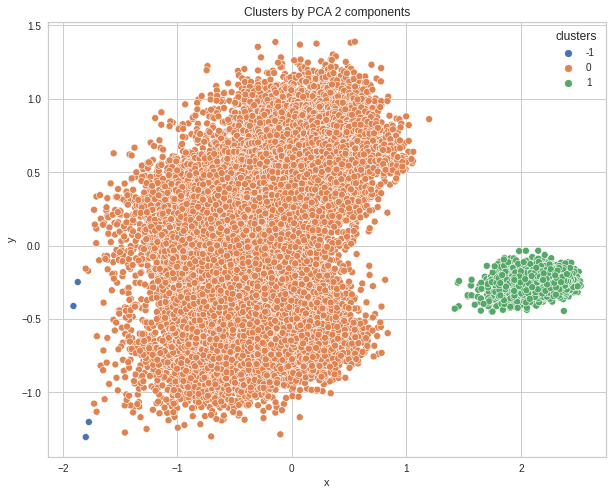

In [342]:
x_axis = reduced['x'] #component/column x in table
y_axis = reduced['y'] #component/column y in table
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=reduced['clusters'], palette ="deep")
plt.title('Clusters by PCA 2 components')
plt.show()

#Hierarchical Clustering

#Performance

*   Silhouette Coefficient: 1 best, -1 worst
*   Davies Bouldin Score: low best
*   Dunn index: 




In [319]:
#KMeans
print('Silhouette Coefficient: ', visualizer3_2d.silhouette_score_)
print('Davies Bouldin Score: ', davies_bouldin_score(data_2d, kmeans.labels_))

Silhouette Coefficient:  0.46473275049510004
Davies Bouldin Score:  1.6302978896531697


In [320]:
#DBScan
print('Silhouette Coefficient: ', silhouette_score(data_scaled, labels))
print('Davies Bouldin Score: ', davies_bouldin_score(data_scaled, db.labels_))

Silhouette Coefficient:  0.05998776768265947
Davies Bouldin Score:  2.4980472870038892
